Варіант 8. Виконати гістограмне збільшення контрастності (див. лекція №1). Провести порівняльний аналіл

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [40]:
def get_cdf(image_c):
  img_gray = np.mean(image_c, axis=2).astype(np.uint8)
  hist, bins = np.histogram(img_gray.flatten(), 255, [0, 255])
  return hist.cumsum()

def preprocess_img(img_name, alpha, s, t = 2):

  img = Image.open('/content/'+img_name)

  img_array = np.array(img)

  img_gray = np.mean(img_array, axis=2).astype(np.uint8) # UInt8 — [0 : 255]
  hist, bins = np.histogram(img_gray.flatten(), 256, [0, 256])
  cdf = hist.cumsum()
  cdf_normalized = cdf / cdf.max()

  red, green, blue = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
  red = np.clip((red + s) * alpha - t, 0, 255)
  green = np.clip((green + s) * alpha - t, 0, 255)
  blue = np.clip((blue + s) * alpha - t, 0, 255)
  contrasted_img = Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2)))

  fig, axes = plt.subplots(2, 3, figsize=(16,8))

  axes[0][0].imshow(img)
  axes[0][0].set_title('Original')
  axes[0][1].plot(hist)
  axes[0][1].set_title('Original histogram')
  axes[0][2].plot(cdf)
  axes[0][2].set_title('CDF')

  axes[1][0].imshow(contrasted_img)
  axes[1][0].set_title('Contrasted')
  axes[1][1].plot(np.histogram(np.array(contrasted_img).ravel(), 256, [0, 256])[0])
  axes[1][1].set_title('Contrasted histogram')
  axes[1][2].plot(get_cdf(contrasted_img))
  axes[1][2].plot(cdf)
  axes[1][2].set_title('CDF')

  plt.show()

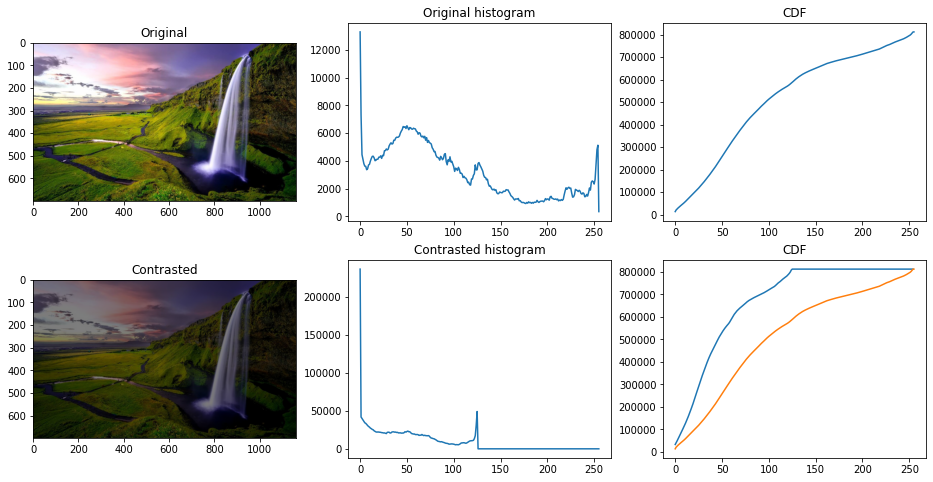

In [44]:
preprocess_img('high_cont.jpg', 0.5, 0)

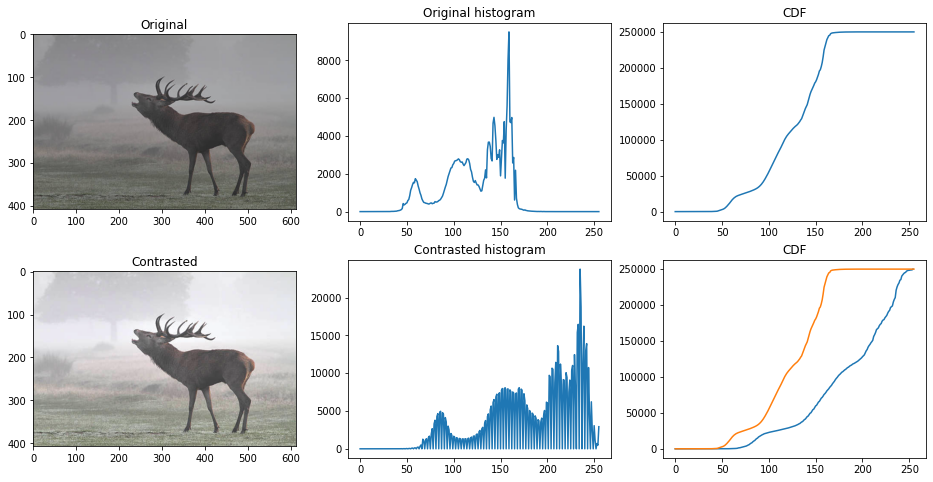

In [32]:
preprocess_img('low_cont.jpg', 1.5, 0)

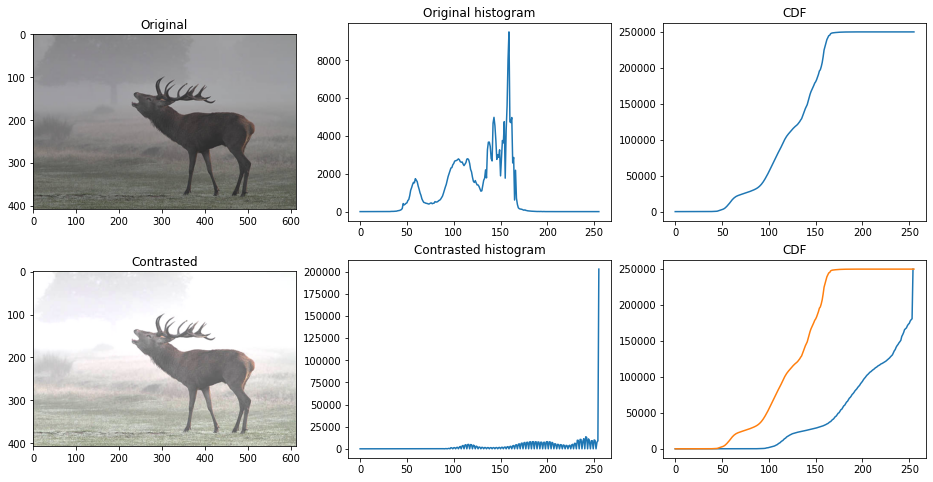

In [42]:
preprocess_img('low_cont.jpg', 1.5, 20)

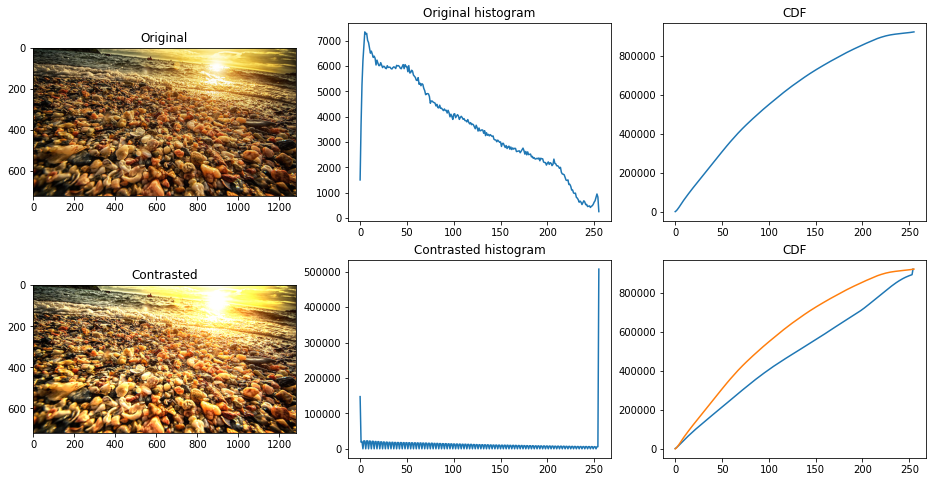

In [33]:
preprocess_img('high_det.jpg', 1.5, 0)

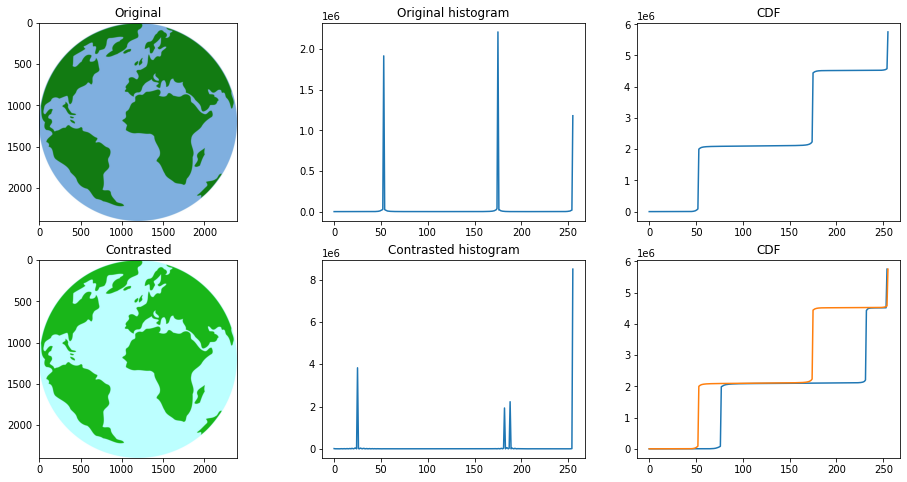

In [34]:
preprocess_img('low_det.jpg', 1.5, 0)